# Contest 1

Importing drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# OVERVIEW

the first thing i have to do is importing my dataset named train from the folder "CONTEST 1". The problem is to classify a set of instances of the file "test" with a minimum accouracy of 0,636. 
This dataset talk about the analysis that are made to check if a patient has a prostate cancer. So we have a series of features and a target feature "Cancer" that represent the results of this analysis.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix

data = pd.read_csv('drive/MyDrive/Colab Notebooks/CONTEST 1/Train.csv')

so now we can see the number of positive and negative in this way

In [ ]:
index = data.index
number_of_rows = len(index)
print(number_of_rows)

positivi = data.loc[data['CANCER'] == 1]
negativi = data.loc[data['CANCER'] == 0]
index_n = negativi.index
index_p = positivi.index
number_positive = len(index_p)
number_negative = len(index_n)
print(number_positive)
print(number_negative)

65
42
23


# DATA PREPARATION

so we can see that we have a total of 65 rows. these rows have 42 positive patients and 23 negative patients. now i have to see graphically(with histograms) the values and occurrences of the features 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f907ab473d0>,
      dtype=object)

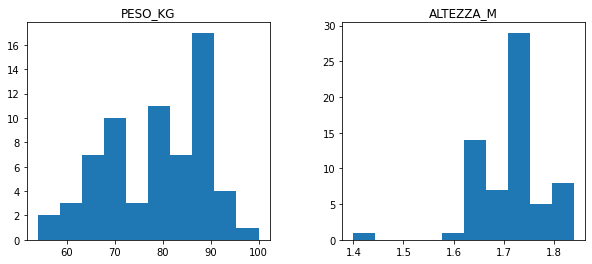

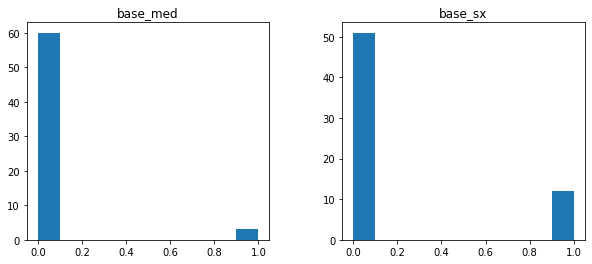

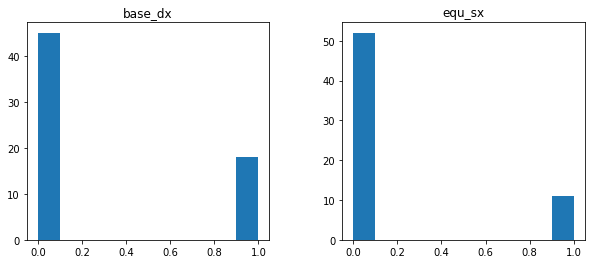

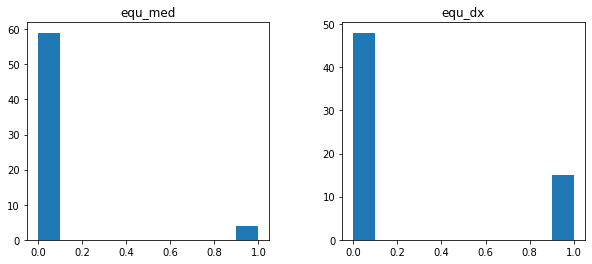

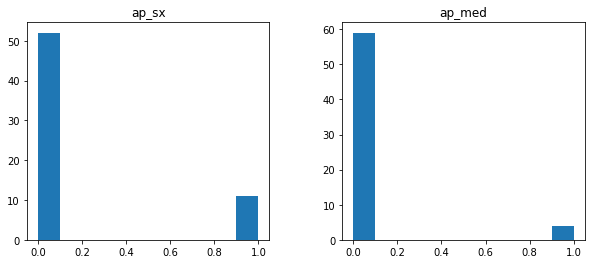

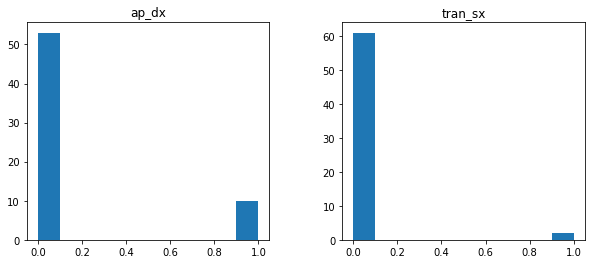

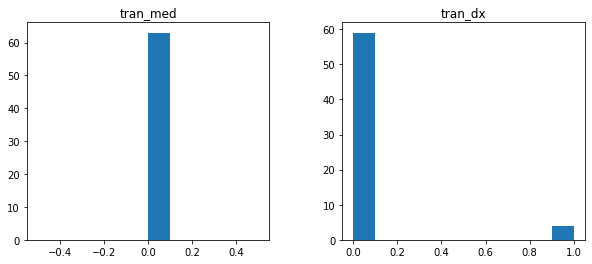

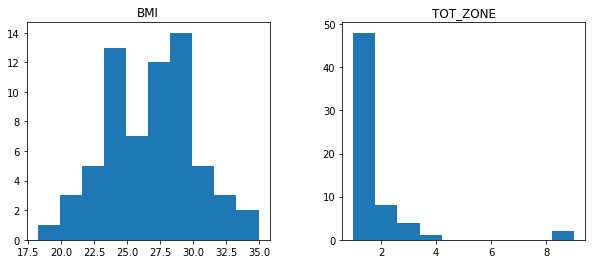

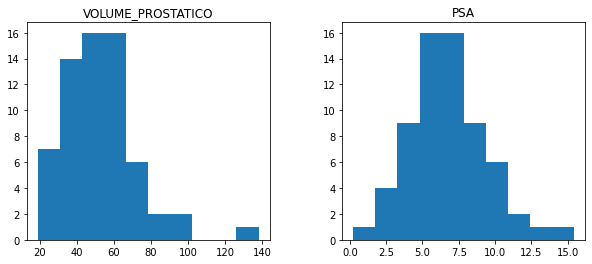

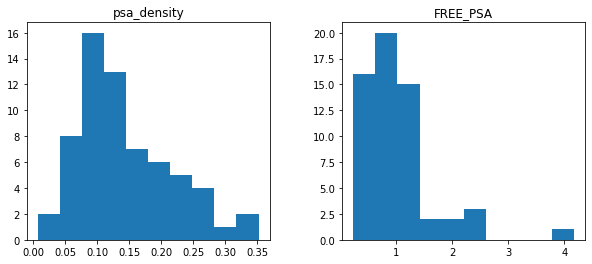

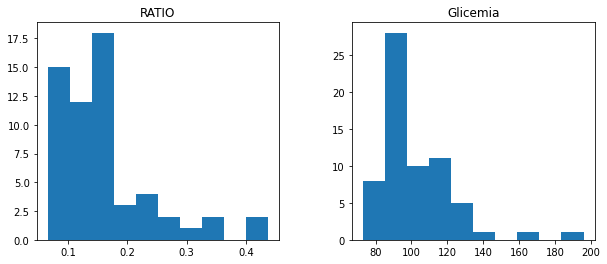

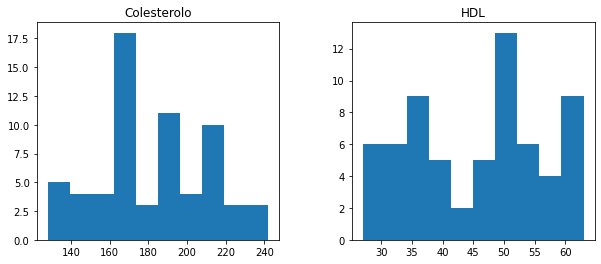

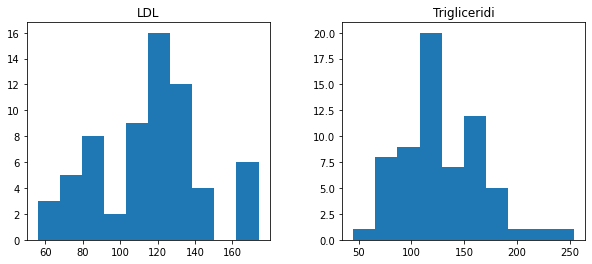

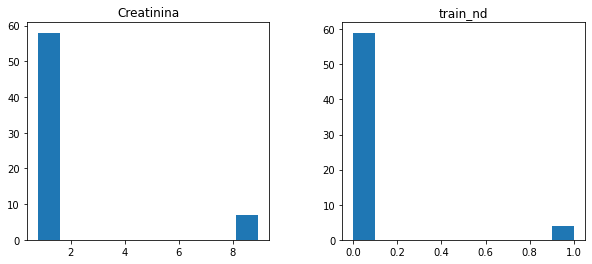

In [ ]:
data.hist(column=['PESO_KG','ALTEZZA_M'], figsize=(10,4), grid=False)
data.hist(column=['base_med','base_sx'], figsize=(10,4), grid=False)
data.hist(column=['base_dx','equ_sx'], figsize=(10,4), grid=False)
data.hist(column=['equ_med','equ_dx'], figsize=(10,4), grid=False)
data.hist(column=['ap_sx','ap_med'], figsize=(10,4), grid=False)
data.hist(column=['ap_dx','tran_sx'], figsize=(10,4), grid=False)
data.hist(column=['tran_med','tran_dx'], figsize=(10,4), grid=False)
data.hist(column=['BMI','TOT_ZONE'], figsize=(10,4), grid=False)
data.hist(column=['VOLUME_PROSTATICO','PSA'], figsize=(10,4), grid=False)
data.hist(column=['psa_density','FREE_PSA'], figsize=(10,4), grid=False)
data.hist(column=['RATIO','Glicemia'], figsize=(10,4), grid=False)
data.hist(column=['Colesterolo','HDL'], figsize=(10,4), grid=False)
data.hist(column=['LDL','Trigliceridi'], figsize=(10,4), grid=False)
data.hist(column=['Creatinina','train_nd'], figsize=(10,4), grid=False)

**Missing values**

after this we want to control the missing values 

In [ ]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

row ID - 0%
PESO_KG - 0%
ALTEZZA_M - 0%
BMI - 0%
base_sx - 3%
base_med - 3%
base_dx - 3%
equ_sx - 3%
equ_med - 3%
equ_dx - 3%
ap_sx - 3%
ap_med - 3%
ap_dx - 3%
tran_sx - 3%
tran_med - 3%
tran_dx - 3%
train_nd - 3%
TOT_ZONE - 3%
VOLUME_PROSTATICO - 2%
PSA - 0%
psa_density - 2%
FREE_PSA - 9%
RATIO - 9%
Glicemia - 0%
Colesterolo - 0%
HDL - 0%
LDL - 0%
Trigliceridi - 0%
Creatinina - 0%
CANCER - 0%


from the train we can see that there are rows with missing values in every "position" features (base_med,base_sx,base_dx etc.). so the first thing that we do is to drop this rows from the dataset because these features are boolean and the number of rows with these missing values is only the 3%. another reason is that in this 3% of rows we have an amount of 70% of missing values for each one.

In [ ]:
data = data.dropna(subset=['base_med'])

now we can check the missing values another time

In [ ]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

row ID - 0%
PESO_KG - 0%
ALTEZZA_M - 0%
BMI - 0%
base_sx - 0%
base_med - 0%
base_dx - 0%
equ_sx - 0%
equ_med - 0%
equ_dx - 0%
ap_sx - 0%
ap_med - 0%
ap_dx - 0%
tran_sx - 0%
tran_med - 0%
tran_dx - 0%
train_nd - 0%
TOT_ZONE - 0%
VOLUME_PROSTATICO - 0%
PSA - 0%
psa_density - 0%
FREE_PSA - 10%
RATIO - 10%
Glicemia - 0%
Colesterolo - 0%
HDL - 0%
LDL - 0%
Trigliceridi - 0%
Creatinina - 0%
CANCER - 0%


in this case we can see that we have increased the percentage of missing values for the features of "FREE_PSA" and "RATIO". it's normal because with this drop, we have less number of rows. so we fill the missing values with the means(beacause we have the 10% of missing values, and for me is too big to drop)

In [ ]:
media_freepsa = data['FREE_PSA'].mean()
media_ratio = data['RATIO'].mean()
data['FREE_PSA'] = data['FREE_PSA'].fillna(media_freepsa)
data['RATIO'] = data['RATIO'].fillna(media_ratio)

now we control the last time the missing values to control if we have some errors

In [ ]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

row ID - 0%
PESO_KG - 0%
ALTEZZA_M - 0%
BMI - 0%
base_sx - 0%
base_med - 0%
base_dx - 0%
equ_sx - 0%
equ_med - 0%
equ_dx - 0%
ap_sx - 0%
ap_med - 0%
ap_dx - 0%
tran_sx - 0%
tran_med - 0%
tran_dx - 0%
train_nd - 0%
TOT_ZONE - 0%
VOLUME_PROSTATICO - 0%
PSA - 0%
psa_density - 0%
FREE_PSA - 0%
RATIO - 0%
Glicemia - 0%
Colesterolo - 0%
HDL - 0%
LDL - 0%
Trigliceridi - 0%
Creatinina - 0%
CANCER - 0%


**OUTLIERS**

now if we control the histogram of Creatinina we can see that there are abnormal values like 8,9 etc.(an human can't has these valuese). so we rescale these values dividing by 10. before this we check values with a box plot 

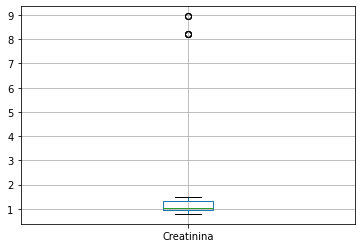

In [ ]:
data.boxplot(column=['Creatinina'])

In [ ]:
data.loc[data.Creatinina > 2 , 'Creatinina'] = data.Creatinina/10

now we check another time to be sure.

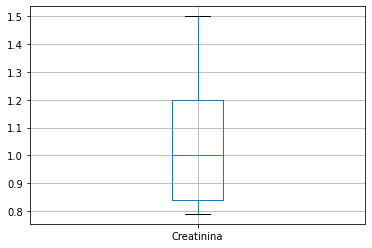

In [ ]:
data.boxplot(column=['Creatinina'])

**MODEL AND FEATURE SELECTION**

for the first time to select feature we want to see the correlation between the class feature and the other features

In [ ]:
import seaborn as sns

x = data.drop('CANCER',1)
y = data['CANCER']
data.head()
plt.figure(figsize=(16,14))
cor = data.corr()

cor_target = abs(cor["CANCER"])
relevant_features = cor_target[cor_target<0.5]
print(relevant_features)

row ID               0.069447
PESO_KG              0.070070
ALTEZZA_M            0.063639
BMI                  0.017349
base_sx              0.153436
base_med             0.148906
base_dx              0.052646
equ_sx               0.189338
equ_med              0.218908
equ_dx               0.215913
ap_sx                0.277046
ap_med               0.218908
ap_dx                0.046282
tran_sx              0.057276
tran_dx              0.054185
train_nd             0.355455
TOT_ZONE             0.394894
VOLUME_PROSTATICO    0.146927
PSA                  0.059613
psa_density          0.075194
FREE_PSA             0.253895
RATIO                0.334577
Glicemia             0.184927
Colesterolo          0.003962
HDL                  0.031283
LDL                  0.075742
Trigliceridi         0.001234
Creatinina           0.014531
Name: CANCER, dtype: float64


<Figure size 1152x1008 with 0 Axes>

the feature that we can drop is 'Row ID', because it can bring our model in overfitting. Also we can drop features like "PESO_KG","ALTEZZA_M","BMI" that aren't functional for the detection of a Cancer. We can drop psa_density and PSA because FREE_PSA and RATIO are linear combination of these ones.
So we can choose the following ones:
***'base_sx','base_med','equ_sx','equ_med','equ_dx','ap_sx','ap_med','train_nd','TOT_ZONE','VOLUME_PROSTATICO','FREE_PSA','RATIO','Glicemia','Trigliceridi'***

In [ ]:
feature_cols=['base_sx','base_med','equ_sx','equ_med','equ_dx','ap_sx','ap_med','train_nd','TOT_ZONE','VOLUME_PROSTATICO','FREE_PSA','RATIO','Glicemia','Trigliceridi']

**Model Selection**

now we want to select the best model for the features. we use an inner and outer kfold cross validation to select hyperparameter and train the models beacuse we has not so much data. for this we made 2 split for the inner cycle to select hyperparameters and 3 splits for the outer cycle of training. so in this case i have enough data to calculate hyperparameters and train my model. we use a stratified k fold to mantain the occurences' frequency of the classes.And we repeated this cycle for 4 times. we use function StandardScaler to normalize data using gaussian normalization

In [ ]:
X = data[feature_cols].values
y = data.CANCER.values

outer_cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=42)
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

tree = DecisionTreeClassifier()

parameters = {'criterion':['gini', 'entropy'], 'max_depth':[2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'min_samples_leaf':[2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'class_weight':[None, 'balanced']}

clf = GridSearchCV(estimator=tree, param_grid=parameters, scoring=make_scorer(accuracy_score), cv=inner_cv)
clf.fit(X, y)
inner_best_scores = clf.best_score_
inner_best_param = clf.best_params_

nested_score = cross_val_score(clf, X=X, y=y, scoring=make_scorer(accuracy_score), cv=outer_cv)

# print(nested_score)
print('Decision Tree accuracy:', nested_score.mean())

Decision Tree accuracy: 0.6984126984126985


In [ ]:
X = data[feature_cols].values
y = data.CANCER.values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

outer_cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=42)
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

knn = KNeighborsClassifier()

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights':['uniform', 'distance']}

clf = GridSearchCV(estimator=knn, param_grid=parameters, scoring=make_scorer(accuracy_score), cv=inner_cv)
clf.fit(X, y)
inner_best_scores = clf.best_score_
inner_best_param = clf.best_params_

nested_score = cross_val_score(clf, X=X, y=y, scoring=make_scorer(accuracy_score), cv=outer_cv)

# print(nested_score)
print('KNN accuracy:', nested_score.mean())

KNN accuracy: 0.6507936507936508


In [ ]:
X = data[feature_cols].values
y = data.CANCER.values
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
outer_cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=42)
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
svm2 = svm.SVC()
parameters = {'C':[0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8], 'kernel':['linear', 'rbf', 'poly'], 'class_weight':['balanced', None]}
clf = GridSearchCV(estimator=svm2, param_grid=parameters, scoring=make_scorer(accuracy_score), cv=inner_cv)
clf.fit(X, y)
inner_best_scores = clf.best_score_
best_estimator = clf.best_estimator_
nested_score = cross_val_score(clf, X=X, y=y, scoring=make_scorer(accuracy_score), cv=outer_cv)
print('SVM accuracy:', nested_score.mean())

SVM accuracy: 0.7023809523809524


from these results we can choose the svm model. so we use a Backward elimination - scheme dependent approach to drop features and increase the accourancy. 
The result is the following set:
**"TOT_ZONE","FREE_PSA","Glicemia","train_nd","ap_med","Trigliceridi","tran_med"**

In [ ]:
feature_cols = ["TOT_ZONE","FREE_PSA","Glicemia","train_nd","ap_med","Trigliceridi","tran_med"]
X = data[feature_cols].values
y = data.CANCER.values
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
outer_cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=42)
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
svm2 = svm.SVC()
parameters = {'C':[0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8], 'kernel':['linear', 'rbf', 'poly'], 'class_weight':['balanced', None]}
clf = GridSearchCV(estimator=svm2, param_grid=parameters, scoring=make_scorer(accuracy_score), cv=inner_cv)
clf.fit(X, y)
inner_best_scores = clf.best_score_
best_estimator = clf.best_estimator_
nested_score = cross_val_score(clf, X=X, y=y, scoring=make_scorer(accuracy_score), cv=outer_cv)
print('SVM accuracy:', nested_score.mean())

SVM accuracy: 0.7778846153846153


we have passed the threshold of Caronte so we can pass on the test replacing missing values with the mean of training set and rescaling the values of "Creatinina"

In [ ]:
data_test = pd.read_csv('drive/MyDrive/Colab Notebooks/CONTEST 1/Test.csv')
data_test.loc[data_test.Creatinina > 2 , 'Creatinina'] = data_test.Creatinina/10
data_test['FREE_PSA'] = data_test['FREE_PSA'].fillna(media_freepsa)
data_test['RATIO'] = data_test['RATIO'].fillna(media_ratio)

X_trainsvm = data[feature_cols]
y_trainsvm = data.CANCER
X_testsvm = data_test[feature_cols].values
scaler = StandardScaler().fit(X_trainsvm)
X_trainsvm = scaler.transform(X_trainsvm)
X_testsvm = scaler.transform(X_testsvm)
best_estimator.fit(X_trainsvm, y_trainsvm)
y_testsvm = best_estimator.predict(X_testsvm)
data_test['CANCER'] = y_testsvm
print(y_testsvm)

[0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


on the private class we have an accourancy of 0.757